In [ ]:
!pip install textattack[tensorflow]
from textattack.augmentation import WordNetAugmenter
word_net_aug = WordNetAugmenter()

In [ ]:
def balance(df, col_name):
  df_duplicate = df
  label_max = ""

  value_counts_dict = dict(zip(df_duplicate[col_name].value_counts().index, df_duplicate[col_name].value_counts()))
  max_num = max(value_counts_dict.values())

  for k, v in value_counts_dict.items():
    if v == max_num:
      label_max = k


  part_of_df_to_be_aug = df_duplicate[df_duplicate[col_name]==label_max].head(max_num)
  print(part_of_df_to_be_aug.shape)
  part_of_df_to_be_aug['text'] = part_of_df_to_be_aug['text'].apply(lambda text: str(word_net_aug.augment(text)))
  print('Done')
  df_duplicate = df_duplicate.append(part_of_df_to_be_aug)
  print('Appended')
  max_num *= 2

  key = [k for k, v in value_counts_dict.items() if v == max_num/2]
  del value_counts_dict[key[0]]
  print(value_counts_dict, max_num)

  while sum(list(value_counts_dict.values())) != (len(value_counts_dict))*max_num:
    for i in range(len(value_counts_dict)):

      label_name = list(value_counts_dict.keys())[i]
      part_of_df_to_be_aug = df_duplicate[df_duplicate[col_name]==label_name].head(max_num - value_counts_dict[label_name])
      print(part_of_df_to_be_aug.shape)
      part_of_df_to_be_aug['text'] = part_of_df_to_be_aug['text'].apply(lambda text: str(word_net_aug.augment(text)))
      print('Done')
      df_duplicate = df_duplicate.append(part_of_df_to_be_aug)
      print('Appended')
      if max_num > value_counts_dict[label_name]*2:
        value_counts_dict[label_name] *= 2
      else:
        tmp = part_of_df_to_be_aug.shape[0]
        value_counts_dict[label_name] += tmp

    print(df_duplicate.shape, value_counts_dict)

  return df_duplicate

In [ ]:
import pandas as pd
from google.colab import files

In [ ]:
category_upload = files.upload()

Saving category_train_val.csv to category_train_val.csv


In [ ]:
satisfaction_upload = files.upload()

Saving satisfaction_train_val.csv to satisfaction_train_val.csv


In [ ]:
environment_upload = files.upload()

Saving environment_train_val.csv to environment_train_val.csv


In [ ]:
category_df = pd.read_csv('category_train_val.csv')

In [ ]:
satisfaction_df = pd.read_csv('satisfaction_train_val.csv')
environment_df = pd.read_csv('environment_train_val.csv')

In [ ]:
category_df.shape

(5067, 3)

In [ ]:
satisfaction_df.shape, environment_df.shape

((5067, 3), (5067, 3))

In [ ]:
category_balanced_df = balance(category_df, 'category')

(2667, 3)
Done
Appended
{'Autonomy': 1417, 'Competence': 983} 5334
(1417, 3)
Done
Appended
(983, 3)
Done
Appended
(10134, 3) {'Autonomy': 2834, 'Competence': 1966}
(2500, 3)
Done
Appended
(1966, 3)
Done
Appended
(14600, 3) {'Autonomy': 5334, 'Competence': 3932}
(0, 3)
Done
Appended
(1402, 3)
Done
Appended
(16002, 3) {'Autonomy': 5334, 'Competence': 5334}


In [ ]:
satisfaction_balanced_df = balance(satisfaction_df, 'satisfaction')

{'Satisfied': 2124, 'Not Clear': 193, 'Neutral': 114} 2636
(512, 3)
Done
Appended
(193, 3)
Done
Appended
(114, 3)
Done
Appended
(5886, 3) {'Satisfied': 2636, 'Not Clear': 386, 'Neutral': 228}
(0, 3)
Done
Appended
(386, 3)
Done
Appended
(228, 3)
Done
Appended
(6500, 3) {'Satisfied': 2636, 'Not Clear': 772, 'Neutral': 456}
(0, 3)
Done
Appended
(772, 3)
Done
Appended
(456, 3)
Done
Appended
(7728, 3) {'Satisfied': 2636, 'Not Clear': 1544, 'Neutral': 912}
(0, 3)
Done
Appended
(1092, 3)
Done
Appended
(912, 3)
Done
Appended
(9732, 3) {'Satisfied': 2636, 'Not Clear': 2636, 'Neutral': 1824}
(0, 3)
Done
Appended
(0, 3)
Done
Appended
(812, 3)
Done
Appended
(10544, 3) {'Satisfied': 2636, 'Not Clear': 2636, 'Neutral': 2636}


In [ ]:
environment_balanced_df = balance(environment_df, 'environment')

{'Non-Supportive': 1548, 'Supportive': 758} 2761
(1213, 3)
Done
Appended
(758, 3)
Done
Appended
(7038, 3) {'Non-Supportive': 2761, 'Supportive': 1516}
(0, 3)
Done
Appended
(1245, 3)
Done
Appended
(8283, 3) {'Non-Supportive': 2761, 'Supportive': 2761}


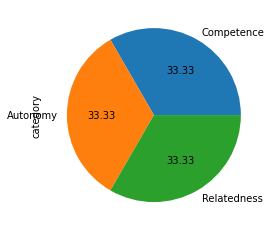

In [ ]:
category_balanced_df['category'].value_counts().plot.pie(autopct="%.2f")

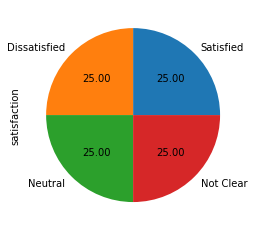

In [ ]:
satisfaction_balanced_df['satisfaction'].value_counts().plot.pie(autopct="%.2f")

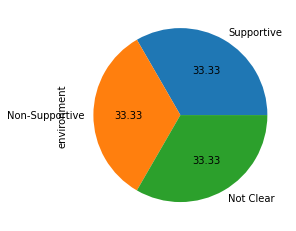

In [ ]:
environment_balanced_df['environment'].value_counts().plot.pie(autopct="%.2f")

In [ ]:
category_balanced_df.to_csv('category_balanced.csv')

In [ ]:
category_balanced_df.to_csv('category_balanced.csv')
satisfaction_balanced_df.to_csv('satisfaction_balanced.csv')
environment_balanced_df.to_csv('environment_balanced.csv')